In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import requests
import pandas as pd
from bs4 import BeautifulSoup

tweets = pd.read_csv('Tweets.csv')

In [44]:
tweets.describe()

,Date,Time,Tweet,Client,Client Simplified
count,30078,30078,30078,30078,30078
unique,2019,24504,29938,19,4
top,01/05/2015,4:40:19 PM,MAKE AMERICA GREAT AGAIN!,Twitter for Android,Twitter for Android
freq,169,7,11,14197,14197


In [45]:
df = pd.DataFrame(tweets)

#a = df.loc[df['Tweet'] == 'immigrant']
#look at tweets that include words like immigrant, mexican, immigrants, borders, etc. and then look at the most common words 
#within the tweets that contain those words
#get the index of those tweets and then look at the dates they were tweeted

key_words = df.loc[df['Tweet'].str.contains("immigrant|mexican|mexican immigrants|mexicans|immigrants", case=False)]
key_words

,Date,Time,Tweet,Client,Client Simplified
421,10/19/2016,9:34:49 PM,Hillary has called for 550% more Syrian immigr...,Twitter Web Client,Twitter Web Client
832,09/25/2016,8:18:40 PM,Five people killed in Washington State by a Mi...,Twitter for Android,Twitter for Android
1348,08/01/2016,6:54:27 PM,"During the GOP convention, CNN cut away from t...",Twitter for iPhone,Twitter for iPhone
1459,07/27/2016,6:08:35 AM,Crooked Hillary Clinton wants to flood our cou...,Twitter for Android,Twitter for Android
1812,06/24/2016,2:48:50 PM,New Government data by the Center for Immigrat...,Twitter for iPhone,Twitter for iPhone
...,...,...,...,...,...
29491,10/05/2011,12:11:49 PM,@BarackObama sold guns to the Mexican drug car...,TweetDeck,Other
29533,09/27/2011,3:32:23 PM,It seems @BarackObama had our tax dollars buy ...,TweetDeck,Other
29603,09/07/2011,1:37:17 PM,Why was @BarackObama selling guns to Mexican d...,TweetDeck,Other
29612,09/02/2011,2:27:03 PM,Fast and Furious put semi-automatics in the ha...,TweetDeck,Other


In [46]:
key_words

,Date,Time,Tweet,Client,Client Simplified
421,10/19/2016,9:34:49 PM,Hillary has called for 550% more Syrian immigr...,Twitter Web Client,Twitter Web Client
832,09/25/2016,8:18:40 PM,Five people killed in Washington State by a Mi...,Twitter for Android,Twitter for Android
1348,08/01/2016,6:54:27 PM,"During the GOP convention, CNN cut away from t...",Twitter for iPhone,Twitter for iPhone
1459,07/27/2016,6:08:35 AM,Crooked Hillary Clinton wants to flood our cou...,Twitter for Android,Twitter for Android
1812,06/24/2016,2:48:50 PM,New Government data by the Center for Immigrat...,Twitter for iPhone,Twitter for iPhone
...,...,...,...,...,...
29491,10/05/2011,12:11:49 PM,@BarackObama sold guns to the Mexican drug car...,TweetDeck,Other
29533,09/27/2011,3:32:23 PM,It seems @BarackObama had our tax dollars buy ...,TweetDeck,Other
29603,09/07/2011,1:37:17 PM,Why was @BarackObama selling guns to Mexican d...,TweetDeck,Other
29612,09/02/2011,2:27:03 PM,Fast and Furious put semi-automatics in the ha...,TweetDeck,Other


In [47]:
import nltk
from nltk.sentiment import vader
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
scores = vader.SentimentIntensityAnalyzer()

In [49]:

compound_scores = []

for i in key_words['Tweet']:
    print(scores.polarity_scores(i))
    compound_scores.append(scores.polarity_scores(i)['compound'])


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.9134}
{'neg': 0.426, 'neu': 0.528, 'pos': 0.046, 'compound': -0.8957}
{'neg': 0.119, 'neu': 0.778, 'pos': 0.103, 'compound': -0.1152}
{'neg': 0.171, 'neu': 0.758, 'pos': 0.071, 'compound': -0.4767}
{'neg': 0.232, 'neu': 0.684, 'pos': 0.084, 'compound': -0.6533}
{'neg': 0.229, 'neu': 0.537, 'pos': 0.234, 'compound': 0.2846}
{'neg': 0.076, 'neu': 0.717, 'pos': 0.207, 'compound': 0.5093}
{'neg': 0.114, 'neu': 0.636, 'pos': 0.25, 'compound': 0.6435}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.317, 'neu': 0.564, 'pos': 0.118, 'compound': -0.7718}
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.865}
{'neg': 0.217, 'neu': 0.677, 'pos': 0.106, 'compound': -0.561}
{'neg': 0.098, 'neu': 0.81, 'pos': 0.092, 'compound': -0.0387}
{'neg': 0.089,

In [53]:
df_scores = pd.DataFrame(compound_scores)
df_scores

,0
0,0.0000
1,-0.9134
2,-0.8957
3,-0.1152
4,-0.4767
...,...
93,-0.8074
94,-0.6908
95,0.0000
96,-0.8481


In [54]:
df_scores.mean()

0   -0.157944
dtype: float64

<AxesSubplot:ylabel='Frequency'>

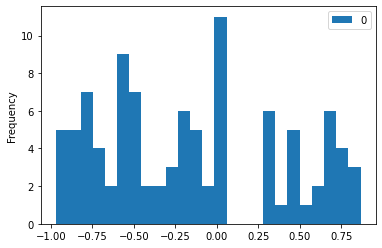

In [59]:
#visualizes the compound scores of tweets that contain the keywords
df_scores.plot(kind='hist', bins = 25)

In [52]:
#test function to help create for loop 
def hiphop():
    j = 0
    for i in music:
        if str(i['artist']['terms']) == 'hip hop':
            #print(str(i['artist']['name'])+ ' is hip hop!')
            j +=1

    print('There are a total of ' + str(j) + ' hip hop artists')

In [129]:
string_tweets = ''''''

In [130]:
for i in key_words['Tweet']:
    string_tweets+=str(i)


In [131]:
string_tweets

'Hillary has called for 550% more Syrian immigrants, but won’t even mention “radical Islamic terrorists.” #Debate… https://t.co/Rf48XkZWbuFive people killed in Washington State by a Middle Eastern immigrant. Many people died this weekend in Ohio from drug overdoses. N.C. riots!During the GOP convention, CNN cut away from the victims of illegal immigrant violence. They don’t want them heard. https://t.co/EHRiLkQDWDCrooked Hillary Clinton wants to flood our country with Syrian immigrants that we know little or nothing about. The danger is massive. NO!New Government data by the Center for Immigration Studies shows more than 3M new legal & illegal immigrants settled..https://t.co/hMFyZc1kAMThe protesters in New Mexico were thugs who were flying the Mexican flag. The rally inside was big and beautiful, but outside, criminals!Just met with courageous family of Sarah Root in Nebraska. Sarah was horribly killed by illegal immigrant, but leaves behind amazing legacy.Everybody is talking about t

In [132]:
from nltk.tokenize import word_tokenize, sent_tokenize

sent = sent_tokenize(string_tweets)
#print(sent)

In [133]:
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)

In [134]:
no_words = ["``", "''","’","//t.co/", "“", "”"]
myStopWords = list(punctuation) + stopwords.words('english')+no_words

wordsNoStop = []
for i in words:
    if i not in myStopWords:
        wordsNoStop.append(i)
#print(words)
print(wordsNoStop)

['Hillary', 'called', '550', 'Syrian', 'immigrants', 'even', 'mention', 'radical', 'Islamic', 'terrorists.', 'Debate…', 'https', '//t.co/Rf48XkZWbuFive', 'people', 'killed', 'Washington', 'State', 'Middle', 'Eastern', 'immigrant', 'Many', 'people', 'died', 'weekend', 'Ohio', 'drug', 'overdoses', 'N.C.', 'riots', 'During', 'GOP', 'convention', 'CNN', 'cut', 'away', 'victims', 'illegal', 'immigrant', 'violence', 'They', 'want', 'heard', 'https', '//t.co/EHRiLkQDWDCrooked', 'Hillary', 'Clinton', 'wants', 'flood', 'country', 'Syrian', 'immigrants', 'know', 'little', 'nothing', 'The', 'danger', 'massive', 'NO', 'New', 'Government', 'data', 'Center', 'Immigration', 'Studies', 'shows', '3M', 'new', 'legal', 'illegal', 'immigrants', 'settled', '..', 'https', '//t.co/hMFyZc1kAMThe', 'protesters', 'New', 'Mexico', 'thugs', 'flying', 'Mexican', 'flag', 'The', 'rally', 'inside', 'big', 'beautiful', 'outside', 'criminals', 'Just', 'met', 'courageous', 'family', 'Sarah', 'Root', 'Nebraska', 'Sarah',

In [135]:
from nltk.collocations import *
from nltk.probability import FreqDist
freq = FreqDist(wordsNoStop)

for i in sorted(freq, key=freq.get, reverse=True):
    print(i,freq[i])



Mexican 41
immigrants 32
illegal 31
http 19
immigrant 15
border 14
Trump 12
drug 10
's 10
Obama 10
Mexico 9
realDonaldTrump 9
people 8
I 8
U.S. 8
us 7
prison 7
n't 7
country 6
The 6
Are 6
Marine 6
BarackObama 6
https 5
killed 5
criminals 5
America 5
stop 5
We 5
Hillary 4
GOP 4
They 4
want 4
legal 4
Immigrants 4
Bush 4
open 4
Jeb 4
must 4
Via 4
Chapo 4
leaders 4
say 4
many 4
call 4
jail 4
guns 4
Clinton 3
wants 3
know 3
nothing 3
New 3
new 3
beautiful 3
Vets 3
Illegal 3
like 3
free 3
year 3
This 3
build 3
never 3
incompetent 3
one 3
El 3
cartels 3
death 3
lord 3
escaped 3
ca 3
saying 3
coming 3
wall 3
Immigrant 3
– 3
love 3
He 3
real 3
much 3
killing 3
jobs 3
trade 3
Univision 3
YES 3
need 3
government 3
get 3
used 3
Sgt 3
Tahmooressi 3
cont 3
Americans 3
lords 3
called 2
Syrian 2
mention 2
massive 2
NO 2
protesters 2
Sarah 2
leaves 2
amazing 2
talking 2
American 2
flags 2
Do 2
care 2
Donald 2
across 2
record 2
Great 2
borders 2
JebBush 2
MEXICAN 2
ObamaCare 2
So 2
crazy 2
cares 2
How 2

In [115]:
freq

FreqDist({'immigr': 57, 'mex': 45, 'illeg': 37, 'http': 19, 'bord': 17, 'ar': 14, 'us': 14, 'trump': 12, 'wil': 12, 'drug': 11, ...})

In [107]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

stemmed_words = [LancasterStemmer().stem(w) for w in words]

In [108]:
stemmed_words

['hil',
 'has',
 'cal',
 'for',
 '550',
 '%',
 'mor',
 'syr',
 'immigr',
 ',',
 'but',
 'won',
 '’',
 't',
 'ev',
 'ment',
 '“',
 'rad',
 'islam',
 'terrorists.',
 '”',
 '#',
 'debate…',
 'https',
 ':',
 '//t.co/rf48xkzwbufive',
 'peopl',
 'kil',
 'in',
 'washington',
 'stat',
 'by',
 'a',
 'middl',
 'eastern',
 'immigr',
 '.',
 'many',
 'peopl',
 'died',
 'thi',
 'weekend',
 'in',
 'ohio',
 'from',
 'drug',
 'overdos',
 '.',
 'n.c.',
 'riot',
 '!',
 'dur',
 'the',
 'gop',
 'conv',
 ',',
 'cnn',
 'cut',
 'away',
 'from',
 'the',
 'victim',
 'of',
 'illeg',
 'immigr',
 'viol',
 '.',
 'they',
 'don',
 '’',
 't',
 'want',
 'them',
 'heard',
 '.',
 'https',
 ':',
 '//t.co/ehrilkqdwdcrooked',
 'hil',
 'clinton',
 'want',
 'to',
 'flood',
 'our',
 'country',
 'with',
 'syr',
 'immigr',
 'that',
 'we',
 'know',
 'littl',
 'or',
 'noth',
 'about',
 '.',
 'the',
 'dang',
 'is',
 'mass',
 '.',
 'no',
 '!',
 'new',
 'govern',
 'dat',
 'by',
 'the',
 'cent',
 'for',
 'immigr',
 'study',
 'show',
 

In [110]:
myStopWords = list(punctuation) + stopwords.words('english')+ no_words

wordsNoStop = []
for i in stemmed_words:
    if i not in myStopWords:
        wordsNoStop.append(i)
#print(words)
print(wordsNoStop)

['hil', 'cal', '550', 'mor', 'syr', 'immigr', 'ev', 'ment', '“', 'rad', 'islam', 'terrorists.', '”', 'debate…', 'https', '//t.co/rf48xkzwbufive', 'peopl', 'kil', 'washington', 'stat', 'middl', 'eastern', 'immigr', 'many', 'peopl', 'died', 'thi', 'weekend', 'ohio', 'drug', 'overdos', 'n.c.', 'riot', 'dur', 'gop', 'conv', 'cnn', 'cut', 'away', 'victim', 'illeg', 'immigr', 'viol', 'want', 'heard', 'https', '//t.co/ehrilkqdwdcrooked', 'hil', 'clinton', 'want', 'flood', 'country', 'syr', 'immigr', 'know', 'littl', 'noth', 'dang', 'mass', 'new', 'govern', 'dat', 'cent', 'immigr', 'study', 'show', 'mor', '3m', 'new', 'leg', 'illeg', 'immigr', 'settl', '..', 'https', '//t.co/hmfyzc1kamthe', 'protest', 'new', 'mexico', 'wer', 'thug', 'wer', 'fly', 'mex', 'flag', 'ral', 'insid', 'big', 'beauty', 'outsid', 'crimin', 'met', 'cour', 'famy', 'sarah', 'root', 'nebrask', 'sarah', 'horr', 'kil', 'illeg', 'immigr', 'leav', 'behind', 'amaz', 'legacy.everybody', 'talk', 'protest', 'burn', 'flag', 'proud',

In [112]:
from nltk.collocations import *
from nltk.probability import FreqDist
freq = FreqDist(wordsNoStop)

for i in sorted(freq, key=freq.get, reverse=True):
    print(i,freq[i])


immigr 57
mex 45
illeg 37
http 19
bord 17
ar 14
us 14
trump 12
wil 12
drug 11
obam 11
realdonaldtrump 10
's 10
peopl 9
kil 9
thi 9
mexico 9
cal 8
mor 8
“ 8
” 8
want 8
com 8
u.s. 8
prison 8
say 8
country 7
leg 7
crimin 7
get 7
n't 7
marin 7
new 6
wer 6
americ 6
vet 6
al 6
ov 6
stop 6
lord 6
lead 6
barackobam 6
https 5
many 5
lov 5
fre 5
via 5
gun 5
becaus 5
hav 5
hil 4
gop 4
govern 4
vot 4
tim 4
car 4
gre 4
bush 4
op 4
giv 4
jeb 4
year 4
must 4
right 4
build 4
wal 4
wher 4
chapo 4
cartel 4
sec 4
mak 4
crim 4
smart 4
nee 4
real 4
much 4
jail 4
releas 4
ment 3
stat 3
cut 3
clinton 3
know 3
noth 3
protest 3
flag 3
beauty 3
talk 3
obamac 3
said 3
across 3
record 3
yo 3
lik 3
speak 3
wom 3
go 3
nev 3
incompet 3
cit 3
amnesty 3
el 3
good 3
dea 3
escap 3
ca 3
negoty 3
– 3
job 3
trad 3
univid 3
friend 3
ye 3
pay 3
allow 3
sgt 3
tahmooress 3
cont 3
syr 2
ev 2
mass 2
fly 2
famy 2
sarah 2
horr 2
leav 2
amaz 2
proud 2
tak 2
donald 2
surg 2
thing 2
jebbush 2
ter 2
tru 2
crazy 2
charg 2
wond 2
undocu

In [120]:
freq

FreqDist({'immigr': 57, 'mex': 45, 'illeg': 37, 'http': 19, 'bord': 17, 'ar': 14, 'us': 14, 'trump': 12, 'wil': 12, 'drug': 11, ...})

In [125]:
sortspeechcount = {k: v for k, v in sorted(freq.items(), key=lambda item: -item[1])}
sortspeechcount

{'immigr': 57,
 'mex': 45,
 'illeg': 37,
 'http': 19,
 'bord': 17,
 'ar': 14,
 'us': 14,
 'trump': 12,
 'wil': 12,
 'drug': 11,
 'obam': 11,
 'realdonaldtrump': 10,
 "'s": 10,
 'peopl': 9,
 'kil': 9,
 'thi': 9,
 'mexico': 9,
 'cal': 8,
 'mor': 8,
 '“': 8,
 '”': 8,
 'want': 8,
 'com': 8,
 'u.s.': 8,
 'prison': 8,
 'say': 8,
 'country': 7,
 'leg': 7,
 'crimin': 7,
 'get': 7,
 "n't": 7,
 'marin': 7,
 'new': 6,
 'wer': 6,
 'americ': 6,
 'vet': 6,
 'al': 6,
 'ov': 6,
 'stop': 6,
 'lord': 6,
 'lead': 6,
 'barackobam': 6,
 'https': 5,
 'many': 5,
 'lov': 5,
 'fre': 5,
 'via': 5,
 'gun': 5,
 'becaus': 5,
 'hav': 5,
 'hil': 4,
 'gop': 4,
 'govern': 4,
 'vot': 4,
 'tim': 4,
 'car': 4,
 'gre': 4,
 'bush': 4,
 'op': 4,
 'giv': 4,
 'jeb': 4,
 'year': 4,
 'must': 4,
 'right': 4,
 'build': 4,
 'wal': 4,
 'wher': 4,
 'chapo': 4,
 'cartel': 4,
 'sec': 4,
 'mak': 4,
 'crim': 4,
 'smart': 4,
 'nee': 4,
 'real': 4,
 'much': 4,
 'jail': 4,
 'releas': 4,
 'ment': 3,
 'stat': 3,
 'cut': 3,
 'clinton': 3,
 'k

<BarContainer object of 20 artists>

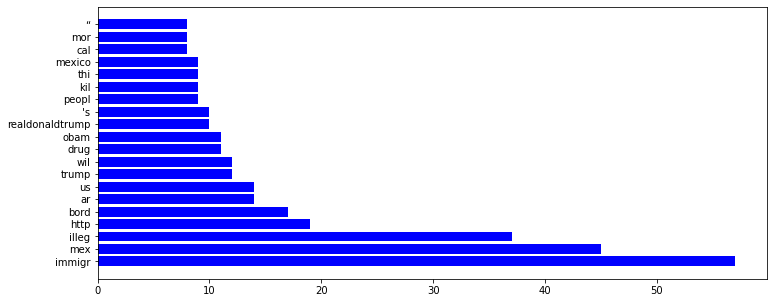

In [140]:


frequentwords = list(sortspeechcount.keys())[:20]
frequentvals = list(sortspeechcount.values())[:20]

plt.figure(figsize=(12,5))
plt.barh(frequentwords,frequentvals,color='blue')



In [138]:
barcolors = []
for i in frequentwords:
    # could be:
    # if i == 'i' or i == 'have' or i == 'dream'
    # or could be:
    if i in ['kil','drug','illeg']:
        barcolors.append('red')
    else:
        barcolors.append('grey')
barcolors

['grey',
 'grey',
 'red',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'red',
 'grey',
 'grey',
 'grey',
 'grey',
 'red']

<BarContainer object of 15 artists>

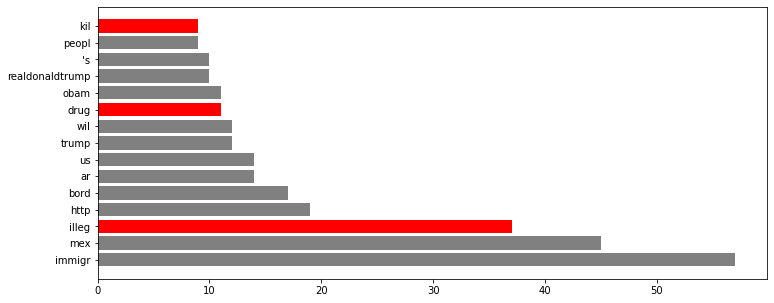

In [139]:
plt.figure(figsize=(12,5))
plt.barh(frequentwords,frequentvals,color=barcolors)